In [3]:
import tensorflow.keras as tk

In [5]:
fashion_mnist = tk.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### Every image is represented as a 28 × 28 array

Data.shape --> Size of the variable in various dimensions. The first value represents number of samples (6000). The pixel intensities are represented as integers (from 0 to 255) 

In [6]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

Since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats)

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

#### Output - 10 classes

y_train has the output in numbers and not the actual class name.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
y_train[0]

4

In [13]:
class_names[y_train[0]]

'Coat'

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

weights

array([[ 0.04660255, -0.00895559, -0.0569969 , ..., -0.02606111,
         0.00260049, -0.01051488],
       [ 0.04686084, -0.0680583 ,  0.01643765, ..., -0.02658929,
        -0.02859929,  0.01728549],
       [ 0.03956311,  0.03161865, -0.03095488, ..., -0.01413091,
         0.06889258, -0.02129825],
       ...,
       [-0.06703422, -0.05813166, -0.05564778, ..., -0.04478233,
        -0.05593613,  0.00093906],
       [ 0.05818062, -0.05265022,  0.06221782, ..., -0.0718542 ,
        -0.01407116,  0.05165009],
       [ 0.01006299, -0.06448983, -0.03090645, ..., -0.02207747,
         0.00396938,  0.02162691]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

2022-09-21 18:37:54.332698: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7081 - accuracy: 0.7655 - val_loss: 0.5046 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4836 - accuracy: 0.8304 - val_loss: 0.4411 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4409 - accuracy: 0.8446 - val_loss: 0.4075 - val_accuracy: 0.8610
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4146 - accuracy: 0.8537 - val_loss: 0.4079 - val_accuracy: 0.8534
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3952 - accuracy: 0.8605 - val_loss: 0.3871 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3783 - accuracy: 0.8661 - val_loss: 0.3761 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3657 - accuracy: 0.8700 - val_loss: 0.3649 - val_ac

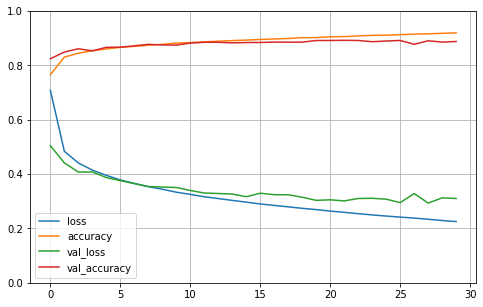

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3379 - accuracy: 0.8817


[0.3378530442714691, 0.8816999793052673]

In [32]:
# Save the trained model architecture
model.save("my_keras_model.h5")

In [23]:
X_new = X_test[:3]

In [29]:
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba,axis=1)

1/1 [==============================] - 0s 34ms/step


In [25]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
y_pred

array([9, 2, 1])

In [31]:
y_test[:3]

array([9, 2, 1], dtype=uint8)